<a href="https://colab.research.google.com/github/satyamkumar073/A-sudoku-game-with-pygame/blob/master/6_Assignment_NB_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

Importing Libaries:

In [1]:
#import libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/drive-download-20210613T203319Z-001/preprocessed_data.csv')

In [4]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [5]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [6]:
y = data['project_is_approved'].values
x = data.drop(['project_is_approved'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(73196, 8) (73196,)
(36052, 8) (36052,)


BOW

In [9]:
# Reffered from Reference notebook 5
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)
print('TrainData essay BOW',X_train_essay_bow.shape)
print('TestData essay BOW',X_test_essay_bow.shape)
features_Bow =vectorizer.get_feature_names()

TrainData essay BOW (73196, 5000)
TestData essay BOW (36052, 5000)


TFIDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)
print("Shape of Train Data",X_train_essay_tfidf.shape)
print("Shape of Test Data TFIDF",X_test_essay_tfidf.shape)
features_tfidf = vectorizer.get_feature_names()

Shape of Train Data (73196, 5000)
Shape of Test Data TFIDF (36052, 5000)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [11]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [12]:
# Reffered from Reference notebook 5
def categoricalEncoding(featureName,data,features_bow,features_tfidf):
 vectorizer = CountVectorizer()
 vectorizer.fit(X_train[featureName].values)
 if(data == 'X_train'):
  return_val = vectorizer.transform(X_train[featureName].values)
  features_Bow.extend(vectorizer.get_feature_names())
  features_tfidf.extend(vectorizer.get_feature_names())
 else:
  return_val = vectorizer.transform(X_test[featureName].values)
 print(return_val.shape)
 return return_val;

In [13]:
# Reffered from Reference notebook 5
print('Train Data Shapes')
X_train_school_state_ohe = categoricalEncoding('school_state','X_train',features_Bow,features_tfidf)
X_train_teacher_prefix_ohe = categoricalEncoding('teacher_prefix','X_train',features_Bow,features_tfidf)
X_train_project_grade_category_ohe = categoricalEncoding('project_grade_category','X_train',features_Bow,features_tfidf)
X_train_clean_categories_ohe = categoricalEncoding('clean_categories','X_train',features_Bow,features_tfidf)
X_train_clean_subcategories = categoricalEncoding('clean_subcategories','X_train',features_Bow,features_tfidf)
print('Test Data Shapes')
X_test_school_state_ohe = categoricalEncoding('school_state','X_test',features_Bow,features_tfidf)
X_test_teacher_prefix_ohe = categoricalEncoding('teacher_prefix','X_test',features_Bow,features_tfidf)
X_test_project_grade_category_ohe = categoricalEncoding('project_grade_category','X_test',features_Bow,features_tfidf)
X_test_clean_categories_ohe = categoricalEncoding('clean_categories','X_test',features_Bow,features_tfidf)
X_test_clean_subcategories = categoricalEncoding('clean_subcategories','X_test',features_Bow,features_tfidf)

Train Data Shapes
(73196, 51)
(73196, 5)
(73196, 4)
(73196, 9)
(73196, 30)
Test Data Shapes
(36052, 51)
(36052, 5)
(36052, 4)
(36052, 9)
(36052, 30)


**Encoding numerical features: price,previous_project_approved**

In [14]:
# Reffered from Reference notebook 5
from sklearn.preprocessing import Normalizer
def NumericalEncoding(featureName,data,features_Bow,features_tfidf):
 normalizer = Normalizer()
 normalizer.fit(X_train[featureName].values.reshape(1,-1))
 if(data == 'X_train'):
  return_val = normalizer.transform(X_train['price'].values.reshape(1,-1))
  return_val = return_val.reshape(-1,1)
  features_Bow.extend(return_val)
  features_tfidf.extend(return_val)
 else:
  return_val = normalizer.transform(X_test['price'].values.reshape(1,-1))
  return_val = return_val.reshape(-1,1)
 print(return_val.shape)
 return return_val


In [15]:
print('Train Data Shapes')
X_train_PPP_ohe = NumericalEncoding('teacher_number_of_previously_posted_projects','X_train',features_Bow,features_tfidf)
X_train_price_ohe = NumericalEncoding('price','X_train',features_Bow,features_tfidf)
print('Test Data Shapes')
X_test_PPP_ohe = NumericalEncoding('teacher_number_of_previously_posted_projects','X_test',features_Bow,features_tfidf)
X_test_price_ohe = NumericalEncoding('price','X_test',features_Bow,features_tfidf)

Train Data Shapes
(73196, 1)
(73196, 1)
Test Data Shapes
(36052, 1)
(36052, 1)


**concating all the features**

In [16]:
# Reffered from Reference notebook 5
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow,X_train_school_state_ohe,X_train_teacher_prefix_ohe,X_train_project_grade_category_ohe,
 X_train_clean_categories_ohe,X_train_clean_subcategories,X_train_PPP_ohe,X_train_price_ohe)).tocsr()
X_ts_bow = hstack((X_test_essay_bow,X_test_school_state_ohe,X_test_teacher_prefix_ohe,X_test_project_grade_category_ohe,
 X_test_clean_categories_ohe,X_test_clean_subcategories,X_test_PPP_ohe,X_test_price_ohe)).tocsr()
X_tr_tfidf = hstack((X_train_essay_tfidf,X_train_school_state_ohe,X_train_teacher_prefix_ohe,X_train_project_grade_category_ohe,
 X_train_clean_categories_ohe,X_train_clean_subcategories,X_train_PPP_ohe,X_train_price_ohe)).tocsr()
X_ts_tfidf = hstack((X_test_essay_tfidf,X_test_school_state_ohe,X_test_teacher_prefix_ohe,X_test_project_grade_category_ohe,
 X_test_clean_categories_ohe,X_test_clean_subcategories,X_test_PPP_ohe,X_test_price_ohe)).tocsr()
print('Final Train Data Set Shape ESSAY IN BOW',X_tr_bow.shape)
print('Final Test Data Sset shape ESSAY IN BOW',X_ts_bow.shape)
print('Final Train Data Set Shape ESSAY IN TFIDF',X_tr_tfidf.shape)
print('Final Test Data Sset shape ESSAY IN TFIDF',X_ts_tfidf.shape)

Final Train Data Set Shape ESSAY IN BOW (73196, 5101)
Final Test Data Sset shape ESSAY IN BOW (36052, 5101)
Final Train Data Set Shape ESSAY IN TFIDF (73196, 5101)
Final Test Data Sset shape ESSAY IN TFIDF (36052, 5101)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [17]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [18]:
# With Ref from Ref Notebook 5
def batch_predict(clf, data):
 y_data_pred = []
 tr_loop = data.shape[0] - data.shape[0]%1000
 for i in range(0, tr_loop, 1000):
  y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
 if data.shape[0]%1000 !=0:
  y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
 return y_data_pred

In [19]:
# With Ref from Reference notebook 5
import matplotlib.pyplot as plt
import sklearn
import math
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
def customFunctionValidation(X_train_total):

 train_auc = []
 cv_auc = []
 alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]  #selecting the best alpha out of these
 X_train_bow, X_cv, y_train_bow, y_cv = train_test_split(X_train_total, y_train, test_size=0.33, stratify=y_train)
 for i in tqdm(alpha):
  model = MultinomialNB(alpha=i, class_prior =[0.5, 0.5])
  model.fit(X_train_bow,y_train_bow)
  y_train_pred = batch_predict(model,X_train_bow)
  y_cv_pred = batch_predict(model,X_cv)
  train_auc.append(roc_auc_score(y_train_bow,y_train_pred))
  cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
 print('Normal Alpha values',alpha)
 alpha = [math.log10(i) for i in alpha]
 print('Log based Alpha values',alpha)
 plt.plot(alpha, train_auc, label='Train AUC')
 plt.plot(alpha, cv_auc, label='CV AUC')
 plt.scatter(alpha, train_auc, label='Train AUC points')
 plt.scatter(alpha, cv_auc, label='CV AUC points')
 plt.legend()
 plt.xlabel("Alpha: hyperparameter")
 plt.ylabel("AUC")
 plt.title("ERROR PLOTS")
 plt.grid()
 plt.show()

100%|██████████| 10/10 [00:02<00:00,  3.42it/s]


Normal Alpha values [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Log based Alpha values [-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


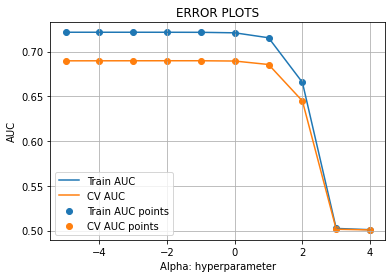

In [20]:
customFunctionValidation(X_tr_bow)

In [21]:
best_alpha = 0.1

In [22]:
from sklearn.metrics import roc_curve, auc,confusion_matrix
def actualModel(x_train_total,x_test_total):

 model = MultinomialNB(alpha=best_alpha,class_prior =[0.5, 0.5])
 model.fit(x_train_total, y_train)
 y_train_pred = batch_predict(model, x_train_total)
 y_test_pred = batch_predict(model, x_test_total)
 train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
 test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
 plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
 plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
 plt.legend()
 plt.xlabel("alpha: hyperparameter")
 plt.ylabel("AUC")
 plt.title("ERROR PLOTS")
 plt.grid()
 plt.show()
 return y_test_pred,model;

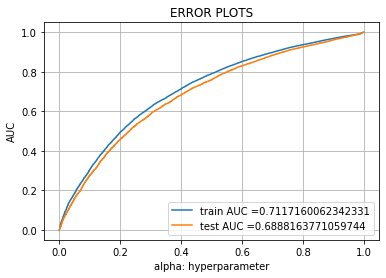

In [23]:
y_test_pred ,model= actualModel(X_tr_bow,X_ts_bow)

**confusion Matrix**

In [24]:
def confusionMatrics():

 y_predicted_values =[]
 for i in y_test_pred:
  if i > 0.5:
    y_predicted_values.append(1)
  else:
    y_predicted_values.append(0)
 print('Confusion Matrics\n',confusion_matrix(y_test,y_predicted_values))

In [25]:
confusionMatrics()

Confusion Matrics
 [[ 3465  1994]
 [10739 19854]]


**Printing top 20 features**

In [27]:
# Reffered from https://stackoverflow.com/questions/54988116/why-am-i-getting-almost-same-top-10-features-using-multinomial-naive-bayes-class
import numpy as np
sorted_idx = np.argsort( model.feature_log_prob_[1] )[-20:]
print(sorted_idx)
print(len(features_Bow))
for i in sorted_idx:
 print(features_tfidf[i])

[ 992 2473 4659 2861 4880 3412 4777 2847 2580 1864 2244 2799 4460 2938
 4401  672 2301 2779 3586 3996]
151491
consideration
inventors
trend
mention
wheel
poorest
venture
mediums
lacking
flowers
horizons
marker
teacher
modify
surprised
calculate
imaginative
male
purchasing
sending


**Applying NB on TFIDF Featurization**

100%|██████████| 10/10 [00:02<00:00,  4.04it/s]


Normal Alpha values [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
Log based Alpha values [-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


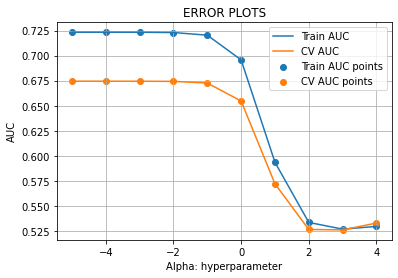

In [28]:
customFunctionValidation(X_tr_tfidf)

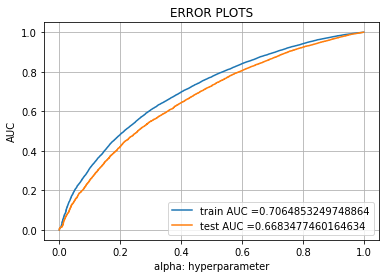

In [29]:
best_alpha = 0.001
y_test_pred,model=actualModel(X_tr_tfidf,X_ts_tfidf)

In [30]:
confusionMatrics()

Confusion Matrics
 [[ 3271  2188]
 [10898 19695]]


**Finding top 20 Features using set2**

In [32]:
# Reffered from https://stackoverflow.com/questions/54988116/why-am-i-getting-almost-same-top-10-features-using-multinomial-naive-bayes-class
import numpy as np
sorted_idx = np.argsort( model.feature_log_prob_[1] )[-20:]
print(sorted_idx)
print(len(features_tfidf))
for i in sorted_idx:
 print(features_tfidf[i])


[5069 5084 5052 5058 5060 5067 5095 5062 4345 5004 5057 5087 5088 5086
 5056 5054 5065 5059 5064 5053]
151491
appliedsciences
health_wellness
mr
grades_9_12
appliedlearning
specialneeds
specialneeds
health_sports
students
ca
grades_6_8
literature_writing
mathematics
literacy
grades_3_5
ms
math_science
grades_prek_2
literacy_language
mrs


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [34]:
print('+-----------+----------------+----------------+-----+')
print('|Vectorizer | Model          | HyperParameter | AUC |')
print('+---------------------------------------------------+')
print('|BOW        | Multinomial NB | 0.1            | 0.68|')
print('+---------------------------------------------------+')
print('|TFIDF      | Multinomial NB | 0.001          | 0.67|')
print('+---------------------------------------------------+')

+-----------+----------------+----------------+-----+
|Vectorizer | Model          | HyperParameter | AUC |
+---------------------------------------------------+
|BOW        | Multinomial NB | 0.1            | 0.68|
+---------------------------------------------------+
|TFIDF      | Multinomial NB | 0.001          | 0.67|
+---------------------------------------------------+
